# core

> Fill in a module description here

In [ ]:
#| default_exp api

In [ ]:
#| hide
from nbdev.showdoc import *


In [ ]:
#| export
import numpy as np
from PIL import Image, ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
import json
import os
from pylsd.lsd import lsd
import cv2
from scipy.signal import argrelmin, argrelmax
import statistics
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
#| export
class ApiClient:
    def __init__(self, path, tmp_dir = "tmp", isHorizontal = True):
        self.input_path = path
        self.tmp_dir = tmp_dir
        self.isHorizontal = isHorizontal
        os.makedirs(tmp_dir, exist_ok=True)
        pass

    def main2(self):
        '''
        メイン処理
        '''
        self.otsu()
        self.skelton()
        self.hlsd()

    @staticmethod
    def main(path, tmp_dir = "tmp", isHorizontal = True):
        ins = ApiClient(path, tmp_dir = tmp_dir, isHorizontal = isHorizontal)
        ins.main2()

    
    def otsu(self):
        '''
        大津の二値化
        '''

        img = cv2.imread(self.input_path)
        gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

        ret2, img_otsu = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU)

        # cv2.imwrite(output_path, img_otsu)

        otsu_path = self.tmp_dir + "/otsu.jpg"
        cv2.imwrite(otsu_path, img_otsu)
        self.otsu_path = otsu_path

    def skelton(self):
        '''
        細線化
        '''

        img = cv2.imread(self.otsu_path)
        gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

        # 二値画像反転
        image = cv2.bitwise_not(gray)

        skelton = cv2.ximgproc.thinning(image, thinningType=cv2.ximgproc.THINNING_ZHANGSUEN)

        output_path = self.tmp_dir + "/skelton.jpg"

        cv2.imwrite(output_path, skelton)

        self.skelton_path = output_path

    def hlsd(self, isHorizontal = True):
        '''
        LSDを使って横線を抽出
        '''

        img = cv2.imread(self.input_path)
        gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

        # 二値画像反転
        image = cv2.bitwise_not(gray)

        # 画像をグレースケールに変換
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # LSDを使って線分を抽出
        lines = lsd(gray)

        # 抽出した線分を描画
        for i in range(lines.shape[0]):
            pt1 = (int(lines[i, 0]), int(lines[i, 1]))
            pt2 = (int(lines[i, 2]), int(lines[i, 3]))
            width = lines[i, 4]
            cv2.line(img, pt1, pt2, (0, 0, 255), int(np.ceil(width / 2)))

        # 画像を表示
        cv2.imwrite(self.tmp_dir + "/hlsd.jpg", img)

        # 横線のみ抽出
        if isHorizontal:
            lines = lines[lines[:, 1] == lines[:, 3]]

        return lines

In [ ]:
show_doc(ApiClient)

---

### ApiClient

>      ApiClient (path, tmp_dir='tmp')

Initialize self.  See help(type(self)) for accurate signature.

In [ ]:
path = "data/612110.jpeg"
ins = ApiClient(path)


In [ ]:
show_doc(ApiClient.otsu)

---

### ApiClient.otsu

>      ApiClient.otsu ()

大津の二値化

In [ ]:
ins.otsu()

<matplotlib.image.AxesImage>

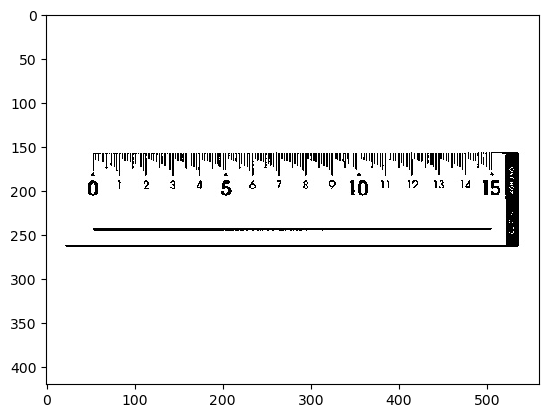

In [ ]:
plt.imshow(mpimg.imread(ins.otsu_path),cmap="gray")

In [ ]:
show_doc(ApiClient.skelton)

---

### ApiClient.skelton

>      ApiClient.skelton ()

細線化

In [ ]:
ins.skelton()

<matplotlib.image.AxesImage>

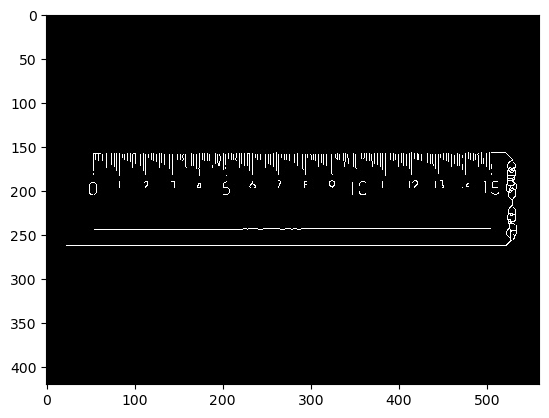

In [ ]:
plt.imshow(mpimg.imread(ins.skelton_path),cmap="gray")

In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()